In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head(n=10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
# Start by checking for columns with missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
# Shape of dataset
df.shape

(891, 11)

In [5]:
# Check percentage of missing values in age. Just 20% are misssing
df.Age.isnull().value_counts()/len(df)

False    0.801347
True     0.198653
Name: Age, dtype: float64

In [6]:
# About 77% of values in Cabin are missing
df.Cabin.isnull().value_counts()/len(df)

True     0.771044
False    0.228956
Name: Cabin, dtype: float64

In [7]:
df.Embarked.isnull().value_counts()/len(df)

False    0.997755
True     0.002245
Name: Embarked, dtype: float64

In [8]:
# Descriptive Statistics for age
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# Drop Cabin column because of two much of missing values
df = df.drop(columns='Cabin')

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Check the value_counts of Embarked before dealing with missing values
df.Embarked.value_counts()/len(df)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [12]:
# Replace missing values in embarked with the mode, in this case S.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Replace missing values in age with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
# Check the class imbalance
df.Survived.value_counts()/len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
# Use stratify split to make sure the data is well represented
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Survived'], shuffle=True)

In [18]:
train.Survived.value_counts()/len(train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [19]:
test.Survived.value_counts()/len(test)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [20]:
# Make a copy of the train data before exploring
train_copy = train.copy()

In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
693,1,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0000,S
528,0,1,"Farthing, Mr. John",male,28.0,0,0,PC 17483,221.7792,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S


In [22]:
df['Sex'].value_counts()/len(df)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [23]:
df_copy = df.copy()

<h2>EXPLORATORY DATA ANALYSIS</h2>

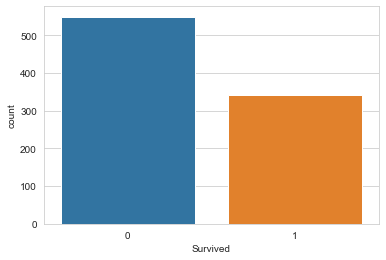

In [24]:
sns.countplot(x='Survived', data=df_copy)

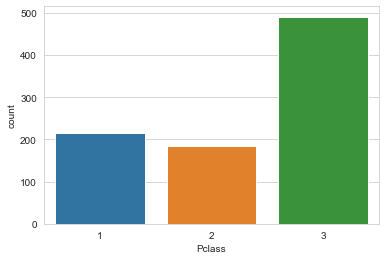

In [25]:
# Pclass distribution
sns.countplot(x='Pclass', data=df_copy)

In [26]:
df_copy['Pclass'].value_counts()/len(df_copy)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

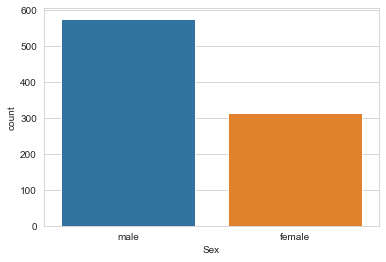

In [27]:
# Sex
sns.countplot(x='Sex', data=df_copy)

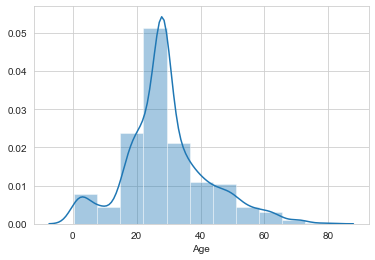

In [28]:
# Age distribution
sns.distplot(df_copy['Age'], bins=11)

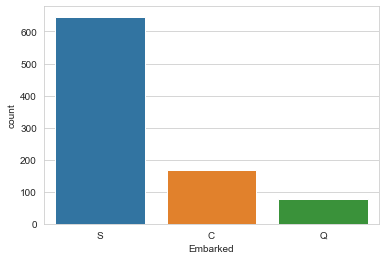

In [29]:
sns.countplot(x='Embarked', data=df_copy)
# Most folks joined from southampton

In [30]:
# Create a feature that tells if person was with family or alone
df_copy['Alone'] = df_copy.SibSp + df_copy.Parch

In [31]:
# if Alone value is >0 then they are with family else they are alone
df_copy['Alone'].loc[df_copy['Alone'] > 0] = 'with family'
df_copy['Alone'].loc[df_copy['Alone'] == 0] = 'without family'

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,with family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,with family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,without family
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,with family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,without family


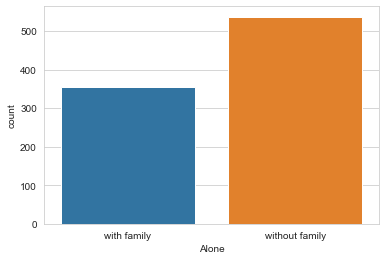

In [33]:
sns.countplot(x='Alone', data=df_copy)

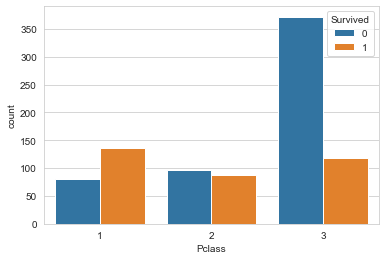

In [34]:
# Check survival per class.
sns.countplot(x='Pclass', data=df_copy, hue='Survived')

In [35]:
df_copy.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

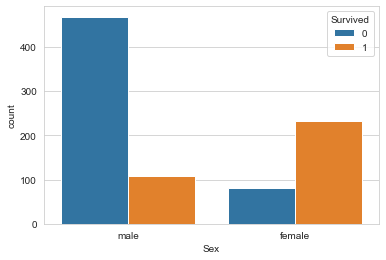

In [36]:
# Check sex that is likely to survive
sns.countplot(x='Sex', data=df_copy, hue='Survived')

In [37]:
# Use groupby to calculate percentage
df_copy.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

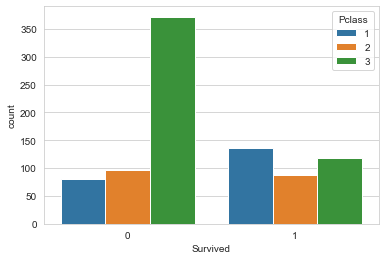

In [38]:
# Check survival by class
sns.countplot(x='Survived', data=df_copy, hue='Pclass')

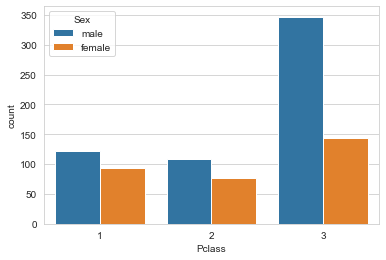

In [39]:
# Check sex by class
sns.countplot(x='Pclass', data=df_copy, hue='Sex')

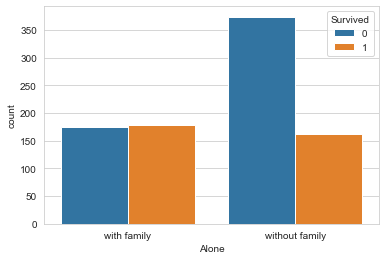

In [40]:
# What are the chances of surviving if you are alone?

sns.countplot(x='Alone', data=df_copy, hue='Survived')

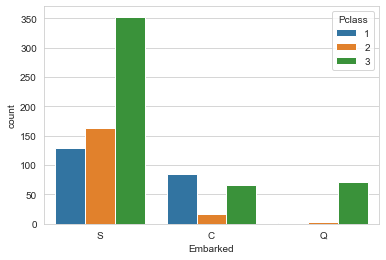

In [41]:
sns.countplot(x='Embarked', data=df_copy, hue='Pclass')

In [42]:
df_copy.groupby('Embarked')['Pclass'].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         129
Name: Pclass, dtype: int64

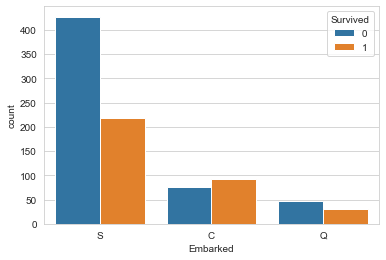

In [43]:
sns.countplot(x='Embarked', data=df_copy, hue='Survived')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


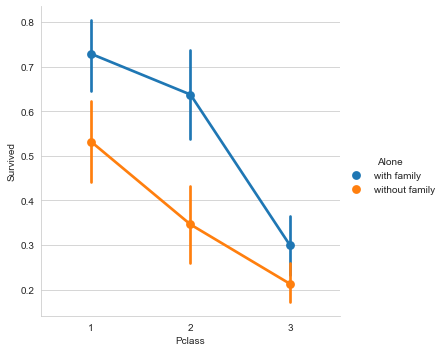

In [44]:
sns.factorplot('Pclass', 'Survived', data=df_copy, hue='Alone')

In [45]:
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,with family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,with family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,without family
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,with family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,without family


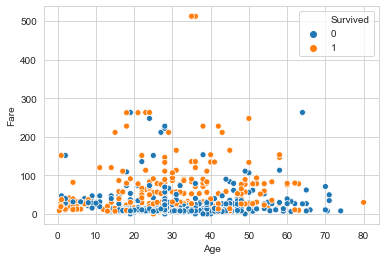

In [46]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_copy)

In [47]:
df_copy.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [48]:
# Create dummies for cat variables
pclass_dummies = pd.get_dummies(data=df_copy['Pclass'], prefix='class')
gender_dummies = pd.get_dummies(data=df_copy['Sex'], prefix='Sex')
alone_dummies = pd.get_dummies(data=df_copy['Alone'])
embarked_dummies = pd.get_dummies(data=df_copy['Embarked'], prefix='Embarked')

In [49]:
embarked_dummies.drop(columns='Embarked_Q', inplace=True)

In [50]:
import math

df_copy['Age'] = df_copy['Age'].apply(math.ceil)
df_copy['Fare'] = df_copy['Fare'].apply(math.ceil)

In [51]:
df_copy = pd.concat([df_copy, pclass_dummies, gender_dummies, alone_dummies, embarked_dummies], axis=1)

In [52]:
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,class_1,class_2,class_3,Sex_female,Sex_male,with family,without family,Embarked_C,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,8,S,with family,0,0,1,0,1,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,72,C,with family,1,0,0,1,0,1,0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S,without family,0,0,1,1,0,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,54,S,with family,1,0,0,1,0,1,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,9,S,without family,0,0,1,0,1,0,1,0,1


In [53]:
df_copy.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Alone', 'Embarked', 'Sex', 'class_3', 'without family', 'Sex_male'], inplace=True)

In [54]:
df_copy.head()

,Survived,Pclass,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22,8,0,0,0,1,0,1
2,1,1,38,72,1,0,1,1,1,0
3,1,3,26,8,0,0,1,0,0,1
4,1,1,35,54,1,0,1,1,0,1
5,0,3,35,9,0,0,0,0,0,1


In [55]:
df_copy.drop(columns='Pclass', inplace=True)

In [56]:
df_copy.head()

,Survived,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_S
PassengerId,,,,,,,,,
1,0,22,8,0,0,0,1,0,1
2,1,38,72,1,0,1,1,1,0
3,1,26,8,0,0,1,0,0,1
4,1,35,54,1,0,1,1,0,1
5,0,35,9,0,0,0,0,0,1


In [57]:
y = df_copy['Survived']
X = df_copy.drop(columns='Survived')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [59]:
# log_reg = LogisticRegression()

In [60]:
# log_reg.fit(X_train, y_train)

In [61]:
# accuracy_score(y_test, log_reg.predict(X_test))

In [62]:
# print(classification_report(y_test, log_reg.predict(X_test)))

In [63]:
# confusion_matrix(y_test, log_reg.predict(X_test))

In [64]:
cross_val_score(estimator=log_reg, X=X_train, y=y_train, scoring='accuracy', cv=10).mean()

NameError: name 'log_reg' is not defined

In [112]:
# Using stratifiedKFold so as to preserve distribution
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = []


for parameter in range(100, 1000):
    for train_index, test_index in kf.split(X_train, y_train):
        X_train1, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train1, y_val = y.iloc[train_index], y.iloc[test_index]
    
        # print(train_index)
    
        #model
        # log_reg = LogisticRegression()
        clf = RandomForestClassifier()
        clf.fit(X_train1, y_train1)
        score = accuracy_score(y_val, clf.predict(X_val))
    
        print('Accuracy score:', score)
        cv_score.append(score)
    # print(train_index)

Accuracy score: 0.7916666666666666
Accuracy score: 0.6805555555555556
Accuracy score: 0.8169014084507042
Accuracy score: 0.7746478873239436
Accuracy score: 0.7887323943661971
Accuracy score: 0.8169014084507042
Accuracy score: 0.8169014084507042
Accuracy score: 0.7605633802816901
Accuracy score: 0.8873239436619719
Accuracy score: 0.7183098591549296


In [ ]:
clf = RandomForestClassifier(optimal_parameter)
cross_val_predict

In [ ]:
cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy').mean()

In [113]:
cv_score = np.array(cv_score)

In [114]:
cv_score.mean()

0.7852503912363068

In [115]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.87      0.90      0.89        69

    accuracy                           0.91       179
   macro avg       0.90      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179



In [116]:
accuracy_score(y_test, clf.predict(X_test))

0.9106145251396648

In [117]:
accuracy_score(y_train, clf.predict(X_train))

0.9157303370786517

In [118]:
confusion_matrix(y_test, clf.predict(X_test))

array([[101,   9],
       [  7,  62]], dtype=int64)

In [ ]:
y_test.value_counts()/len(y_test)

In [72]:
y_prob = log_reg.predict_proba(X_test)

array([[False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ Tr

In [77]:
decision_prob = 0.4

df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,88,15
Yes,22,54


In [86]:
test = pd.read_csv('test.csv')

In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
test = test.drop(columns='Cabin')

In [90]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [91]:
df_copy.Fare.describe()

count    891.000000
mean      32.604938
std       49.699083
min        0.000000
25%        8.000000
50%       15.000000
75%       31.000000
max      513.000000
Name: Fare, dtype: float64

In [92]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [93]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [94]:
test['Alone'] = test.SibSp + test.Parch

test['Alone'].loc[test['Alone'] > 0] = 'with family'
test['Alone'].loc[test['Alone'] == 0] = 'without family'

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [95]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,without family
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,with family
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,without family
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,without family
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,with family


In [96]:
pclass_dummies_t = pd.get_dummies(data=test['Pclass'], prefix='class')
gender_dummies_t = pd.get_dummies(data=test['Sex'], prefix='Sex')
alone_dummies_t = pd.get_dummies(data=test['Alone'])
embarked_dummies_t = pd.get_dummies(data=test['Embarked'], prefix='Embarked')

In [97]:
embarked_dummies_t.drop(columns='Embarked_Q', inplace=True)

In [98]:
test['Age'] = test['Age'].apply(math.ceil)
test['Fare'] = test['Fare'].apply(math.ceil)

In [99]:
test = pd.concat([test, pclass_dummies_t, gender_dummies_t, alone_dummies_t, embarked_dummies_t], axis=1)

In [100]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,class_1,class_2,class_3,Sex_female,Sex_male,with family,without family,Embarked_C,Embarked_S
0,892,3,"Kelly, Mr. James",male,35,0,0,330911,8,Q,without family,0,0,1,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S,with family,0,0,1,1,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,10,Q,without family,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,9,S,without family,0,0,1,0,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,13,S,with family,0,0,1,1,0,1,0,0,1


In [101]:
df_copy.columns

Index(['Survived', 'Age', 'Fare', 'class_1', 'class_2', 'Sex_female',
       'with family', 'Embarked_C', 'Embarked_S'],
      dtype='object')

In [102]:
test_1 = test[['Age', 'Fare', 'class_1', 'class_2', 'Sex_female', 'with family', 'Embarked_C', 'Embarked_S']]

In [103]:
test_1.head()

,Age,Fare,class_1,class_2,Sex_female,with family,Embarked_C,Embarked_S
0,35,8,0,0,0,0,0,0
1,47,7,0,0,1,1,0,1
2,62,10,0,1,0,0,0,0
3,27,9,0,0,0,0,0,1
4,22,13,0,0,1,1,0,1


In [119]:
predictions = clf.predict(test_1)

In [120]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [122]:
filename = 'Submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Submission.csv
